In [1]:
# Importing the dataset
import pandas as pd

# url to the dataset
url = "https://raw.githubusercontent.com/kueyram/dsc550/main/BankChurners.csv"

# importing the dataset into pandas
cc_customers = pd.read_csv(url)

In [2]:
# Let's print the column names
print("The columns names are: ", cc_customers.columns)


The columns names are:  Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [3]:
# Let's display 10 samples from the dataset
cc_customers.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
8697,708219108,Existing Customer,49,M,3,College,Divorced,$80K - $120K,Blue,38,...,9959.0,1143,8816.0,0.661,7300,77,0.638,0.115,0.000305,0.999690
1559,779367858,Existing Customer,39,M,4,High School,Married,$60K - $80K,Blue,28,...,6224.0,1898,4326.0,1.103,3014,58,0.706,0.305,0.000308,0.999690
5953,789662283,Attrited Customer,50,F,3,High School,Married,Less than $40K,Blue,33,...,2140.0,0,2140.0,0.765,2915,50,0.316,0.000,0.998080,0.001916
4357,758086458,Existing Customer,46,F,3,Graduate,Married,Unknown,Blue,39,...,1438.3,0,1438.3,0.646,4111,62,0.550,0.000,0.000535,0.999460
2863,771725808,Existing Customer,43,M,3,Uneducated,Unknown,$80K - $120K,Blue,31,...,28700.0,769,27931.0,0.901,3395,71,0.578,0.027,0.000169,0.999830
9622,717992433,Existing Customer,50,M,4,Graduate,Married,$80K - $120K,Blue,39,...,11900.0,1796,10104.0,0.651,14666,101,0.980,0.151,0.000058,0.999940
3169,715480983,Existing Customer,55,F,2,College,Single,Less than $40K,Blue,36,...,5719.0,892,4827.0,0.589,3403,68,0.417,0.156,0.000186,0.999810
95,719712633,Existing Customer,64,M,1,Graduate,Married,Less than $40K,Blue,52,...,1709.0,895,814.0,1.656,1673,32,0.882,0.524,0.000343,0.999660
773,713989233,Existing Customer,61,M,0,Post-Graduate,Married,Unknown,Blue,53,...,14434.0,1927,12507.0,2.675,1731,32,3.571,0.134,0.000193,0.999810
3777,713446083,Existing Customer,49,F,4,Uneducated,Unknown,Unknown,Blue,39,...,11545.0,1732,9813.0,0.871,3996,65,0.548,0.150,0.000206,0.999790


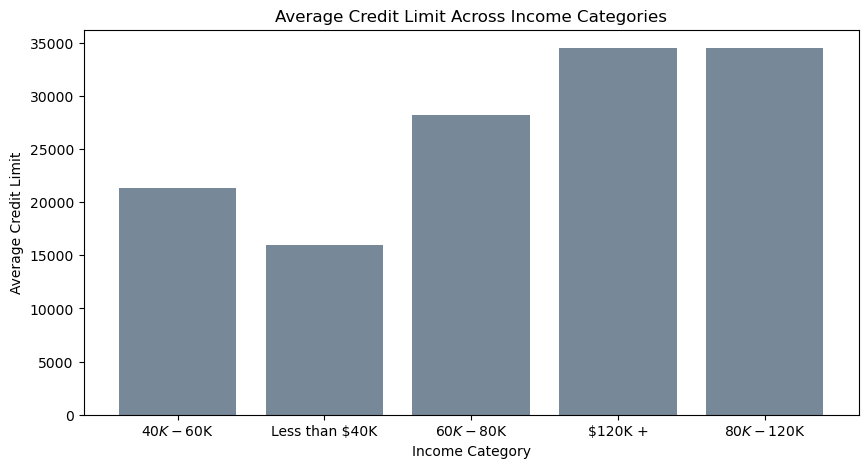

In [4]:
# Bar chart to display the average credit

import matplotlib.pyplot as plt

# Let's filter the dataset by removing the rows where the Income_Category is Unknown
filtered_cc_customers = cc_customers[cc_customers['Income_Category'] != 'Unknown']


# Let's group the data by customer_age, gender, education_level and income_category and calculate the average credit limit
avg_credit_limit = filtered_cc_customers.groupby(['Customer_Age', 'Gender', 'Education_Level', 'Income_Category'])['Credit_Limit'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(avg_credit_limit['Income_Category'], avg_credit_limit['Credit_Limit'], color='lightslategray')
plt.xlabel('Income Category')
plt.ylabel('Average Credit Limit')
plt.title('Average Credit Limit Across Income Categories')
plt.show()

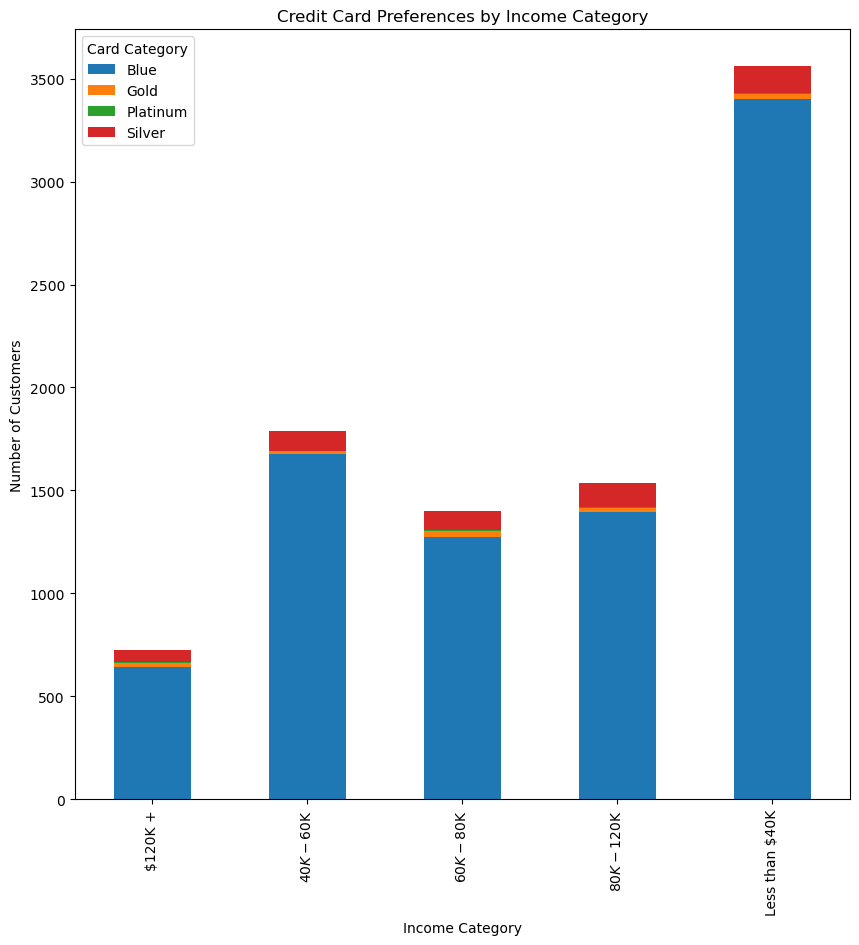

In [5]:
# Stack bar chat with the count of each credit card type for different income categories

import matplotlib.pyplot as plt

# let's create a pivot table to calculate the count of each credit card type by income category
card_preferences = filtered_cc_customers.pivot_table(index='Income_Category', columns='Card_Category', values='CLIENTNUM', aggfunc='count')

# Plotting the stacked bar chart
card_preferences.plot(kind='bar', stacked=True, figsize=(10, 10))
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.title('Credit Card Preferences by Income Category')
plt.legend(title='Card Category')

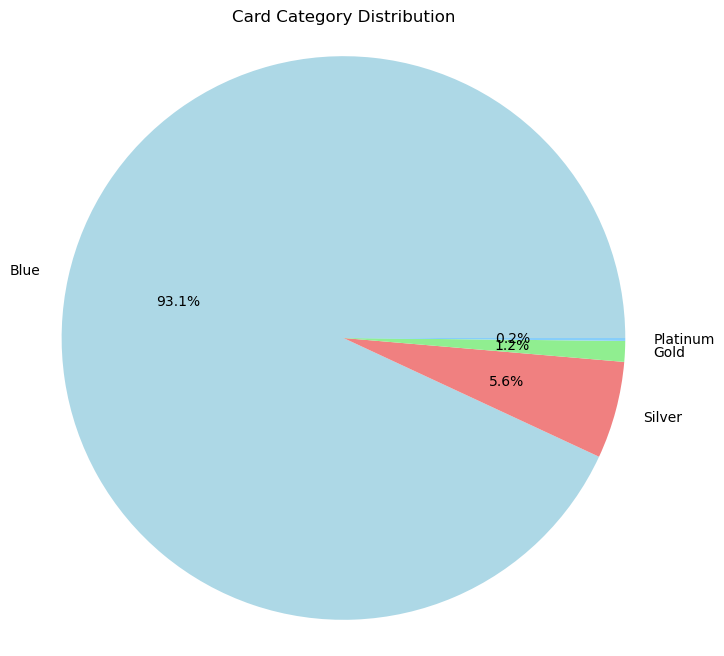

In [6]:
# Pie chart of the number of customers in each card category

# Count of the number of customers in each card category
card_category_counts = filtered_cc_customers['Card_Category'].value_counts()

# Plotting the pie chart for card category distribution
plt.figure(figsize=(8, 8))
plt.pie(card_category_counts, labels=card_category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Card Category Distribution')
plt.axis('equal')
plt.show()


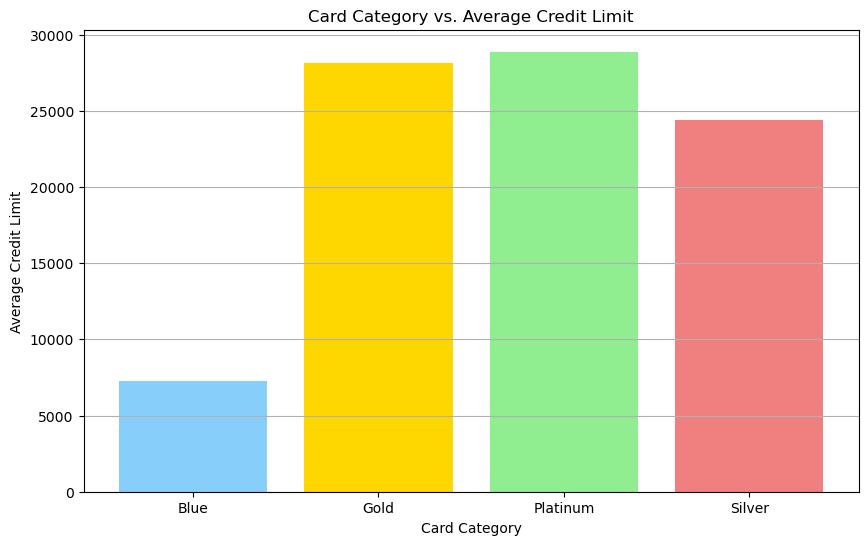

In [7]:
# Bar chart of the card category vs average credit limit
import matplotlib.pyplot as plt

# Group by card category and calculating average credit limit
avg_credit_limit_card = filtered_cc_customers.groupby('Card_Category')['Credit_Limit'].mean().reset_index()

# Plotting the bar chart for card category vs. average credit limit
plt.figure(figsize=(10, 6))
plt.bar(avg_credit_limit_card['Card_Category'], avg_credit_limit_card['Credit_Limit'], color=['lightskyblue', 'gold', 'lightgreen', 'lightcoral'])
plt.xlabel('Card Category')
plt.ylabel('Average Credit Limit')
plt.title('Card Category vs. Average Credit Limit')
plt.grid(axis='y')
plt.show()

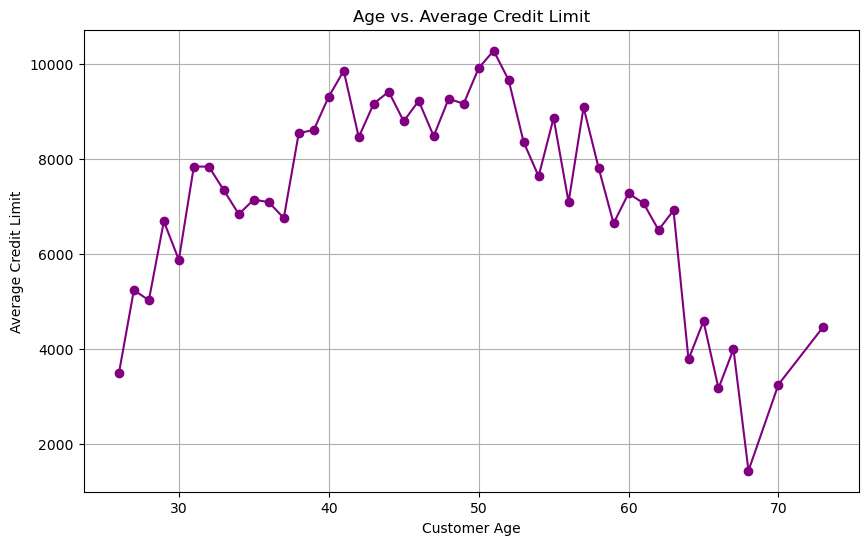

In [8]:
# Line chart of the age vs average credit limit

import matplotlib.pyplot as plt

# Group by customer age and calculating average credit limit
avg_credit_limit_age = filtered_cc_customers.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()

# Plotting the line chart for age vs average credit limit
plt.figure(figsize=(10, 6))
plt.plot(avg_credit_limit_age['Customer_Age'], avg_credit_limit_age['Credit_Limit'], marker='o', color='purple', linestyle='-')
plt.xlabel('Customer Age')
plt.ylabel('Average Credit Limit')
plt.title('Age vs. Average Credit Limit')
plt.grid(True)
plt.show()

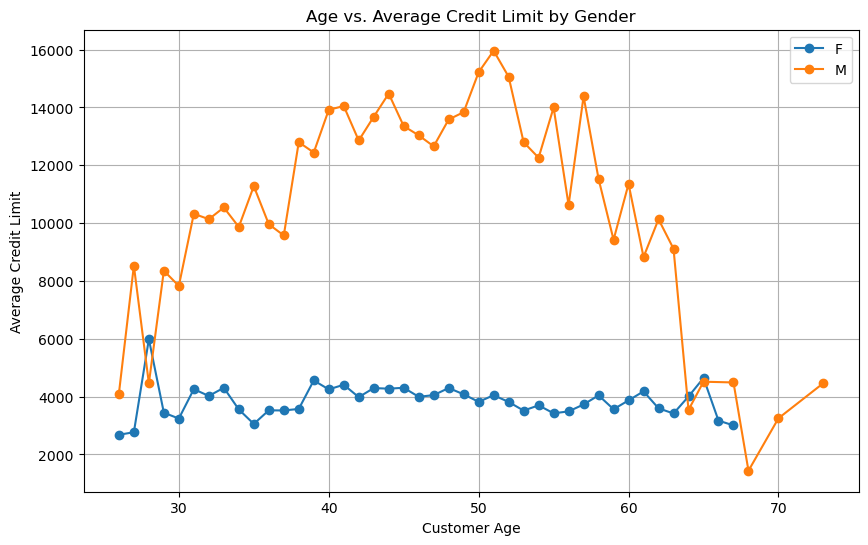

In [9]:
# Line chart pf the age vs credit limit with gender differentiation

import matplotlib.pyplot as plt

# Groupby customer age, gender, and calculating average credit limit
avg_credit_limit_age_gender = filtered_cc_customers.groupby(['Customer_Age', 'Gender'])['Credit_Limit'].mean().reset_index()

# Plotting the line chart for age vs. average credit limit with gender difference
plt.figure(figsize=(10, 6))
for gender in avg_credit_limit_age_gender['Gender'].unique():
    subset = avg_credit_limit_age_gender[avg_credit_limit_age_gender['Gender'] == gender]
    plt.plot(subset['Customer_Age'], subset['Credit_Limit'], marker='o', linestyle='-', label=gender)

plt.xlabel('Customer Age')
plt.ylabel('Average Credit Limit')
plt.title('Age vs. Average Credit Limit by Gender')
plt.legend()
plt.grid(True)
plt.show()
